# Анализ оттока клиентов банка "Метанпром"

Представленны данные о клиентах банка "Метанпром". Банк располагается в Ярославле и областных городах: Ростов Велирий и Рыбинск.

**Заказчик:** маркетинговый отдел банка "Метанпром".

**Задача:** проанализировать клиентов регионального банка и выделить сегменты клиентов, которые склонны уходить из банка.  

**Ход исследования:**

1. Загрузка и описание данных
2. Подготовка данных:
- замена названий столбцов на более корректные
- обработка пропусков
- проверка дубликатов
3. Исследовательский анализ данных
- анализ портретов клиентов в разрезе оттока
- анализ распределения признаков в разрезе оттока клиентов
- исследование коррелирующих признаков
4. Проверка гипотез:
- различия дохода у отточных клиентов и клиентов которые остались
- возрастные различия у отточных клиентов и клиентов которые остались
5. Промежуточные итоги: определиния признаков для клиентов с наибольшими показателями оттока
6. Сегментация: сегментация на основе выделенных признаков, выделение приоритетных сигментов
7. Выводы и рекомендации для заказчика.

## Обзор данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")


In [2]:
data = pd.read_csv('/datasets/bank_scrooge.csv')

In [3]:
# выведем первые 10 строк 
display(data.head(10))

,USERID,score,city,gender,age,equity,balance,products,credit_card,last_activity,EST_SALARY,churn
0,183012,850.0,Рыбинск,Ж,25.0,1,59214.82,2,0,1,75719.14,1
1,146556,861.0,Рыбинск,Ж,37.0,5,850594.33,3,1,0,86621.77,0
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
3,225363,866.0,Ярославль,Ж,51.0,5,1524746.26,2,0,1,174423.53,1
4,157978,730.0,Ярославль,М,34.0,5,174.00,1,1,0,67353.16,1
5,202305,856.0,Рыбинск,М,56.0,4,863687.24,3,1,0,156619.80,0
6,177259,807.0,Ярославль,Ж,39.0,3,405042.44,3,0,1,103838.32,0
7,218868,825.0,Ярославль,Ж,38.0,4,458145.40,2,1,1,68085.48,0
8,211686,923.0,Ярославль,М,54.0,5,1206337.87,2,1,0,155371.79,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0


In [4]:
#выведем основную информацию о датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   USERID         10000 non-null  int64  
 1   score          10000 non-null  float64
 2   city           10000 non-null  object 
 3   gender         10000 non-null  object 
 4   age            9974 non-null   float64
 5   equity         10000 non-null  int64  
 6   balance        7705 non-null   float64
 7   products       10000 non-null  int64  
 8   credit_card    10000 non-null  int64  
 9   last_activity  10000 non-null  int64  
 10  EST_SALARY     10000 non-null  float64
 11  churn          10000 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 937.6+ KB


В таблице 11 колонок. **Согласно документации к данным:**

*USERID* - идентификатор пользователя;  
*score* - баллы кредитного скоринга;  
*city* - город;  
*gender* - пол;  
*age* - возраст;  
*equity* - количество балов собственности;  
*balance* - баланс на счете;  
*products* - количество продуктов банка, которыми пользуется клиент;  
*credit_card* - есть ли кредитная карта;  
*last_activity* - активный клиент;  
*EST_SALARY* - оценочный доход клиента;  
*churn* - признак оттока.  

Количество значений в столбцах age и balance различается. Значит в данных есть пропущенные значения.  
Названия колонок USERID и EST_SALARY требуется привести к нижнему регистру.

## Подготовка данных

In [5]:
# Приведем названия столбцов к нижнему рекистру
data.columns = data.columns.str.lower()

In [6]:
print('Количество явных дубликатов:', data.duplicated().sum())

Количество явных дубликатов: 0


In [7]:
# дополнительно рассмотрим количесто дубликатов по столбцу userid
print('Количество дубликатов по столбцу userid:', data.duplicated(['userid'], keep=False).sum())

Количество дубликатов по столбцу userid: 146


In [8]:
# выведем дубликаты по столбцу userid
data_double = data[data['userid'].isin(data[data.duplicated(['userid'])]['userid'])].sort_values(['userid'])
data_double.head(10)

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
1893,116540,883.0,Рыбинск,Ж,55.0,1,362756.49,3,0,1,175920.48,1
7694,116540,887.0,Ярославль,Ж,38.0,0,NaN,1,0,1,119247.61,0
7542,117943,880.0,Ярославль,Ж,40.0,0,NaN,1,1,0,137718.93,0
4866,117943,855.0,Рыбинск,Ж,32.0,6,1036832.93,4,1,1,107792.71,1
5896,120258,905.0,Ярославль,М,30.0,0,NaN,1,1,1,146427.96,0
5863,120258,908.0,Рыбинск,Ж,38.0,4,2213581.63,2,0,1,160327.77,1
1411,123461,829.0,Ярославль,Ж,59.0,0,96222.44,2,0,1,102771.55,1
8638,123461,934.0,Рыбинск,М,34.0,0,NaN,2,1,0,291619.27,0
8164,124450,859.0,Ярославль,Ж,38.0,6,516811.20,1,1,1,95144.63,1
9775,124450,758.0,Рыбинск,Ж,36.0,0,73574.07,2,0,1,79963.59,0


In [9]:
# рассмотрим отточность и лояльность в таблице с дубликатами
data_double.groupby('churn')['churn'].count()

churn
0    96
1    50
Name: churn, dtype: int64

In [10]:
print('Отточных клиентов в Рыбинске:', 
      data_double[(data_double['city'] == 'Рыбинск')&(data_double['churn'] == 1)]['churn'].count())
print('Отточных клиентов в Ярославле:', 
      data_double[(data_double['city'] == 'Ярославль')&(data_double['churn'] == 1)]['churn'].count())

Отточных клиентов в Рыбинске: 21
Отточных клиентов в Ярославле: 29


In [11]:
# проверим есть ли дубликаты пользователй из одного города
data.duplicated(['userid','city']).sum()

0

Полные дубликаты строк отсутствуют. Дубликаты в столбце userid встречаются только в городах: Ярославль и Рыбинск. Каких либо четких взаимосвязей не выявленно, скорее всего технический сбой при выгрузках из разных баз.  
В том числе мы посмотрели по таблице с дубликатами отточных и лояльных клиентов, обе категории равны, но отточных клиентов по Ярославлю оказалось больше. 

In [12]:
# посчитаем количество пропусков
print('Количество пропусков:')
data.isna().sum()

Количество пропусков:


userid              0
score               0
city                0
gender              0
age                26
equity              0
balance          2295
products            0
credit_card         0
last_activity       0
est_salary          0
churn               0
dtype: int64

В датафрейме имеются пропуски в столбцах age (26 пропусков) и balance (2295 пропусков). Пропусков по столбцу age не много и их можно удалить. В столбце balance пропусков значительная часть, их нужно будет проанализировать. 

In [13]:
# удалим пропуски по столбцу age
data = data.dropna(subset=['age'])

In [14]:
balance_nan = data.query('balance.isna()')
balance_nan

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn
2,120722,892.0,Рыбинск,Ж,30.0,0,NaN,1,1,1,107683.34,0
9,133130,906.0,Ярославль,Ж,67.0,0,NaN,1,0,1,238055.53,0
10,148929,927.0,Ростов,М,52.0,0,NaN,1,1,1,196820.07,0
11,172184,921.0,Ростов,М,41.0,0,NaN,1,1,1,217469.48,0
19,127034,922.0,Рыбинск,Ж,53.0,0,NaN,1,0,0,147094.82,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9976,208085,876.0,Ростов,М,38.0,0,NaN,1,0,0,171763.69,0
9984,125941,729.0,Ярославль,Ж,42.0,0,NaN,1,1,1,687538.70,0
9993,219924,884.0,Рыбинск,Ж,36.0,0,NaN,1,1,1,169844.88,0
9996,139170,894.0,Ярославль,М,46.0,0,NaN,1,1,0,196898.29,0


In [15]:
# сгруппируем строки с пропущенными значениями по признаку отткока 
balance_nan_churn = balance_nan.pivot_table (index = 'churn', values = 'userid', aggfunc = ['count']).reset_index()
balance_nan_churn.columns = ['churn', 'count']
balance_nan_churn['%'] = round(balance_nan_churn['count']/balance_nan_churn['count'].sum()*100, 2)
balance_nan_churn

,churn,count,%
0,0,2266,99.43
1,1,13,0.57


In [16]:
# проверим связано ли наличие пропусков наличием кредитных карт 
credit_card_churn = balance_nan.pivot_table (index = 'credit_card', values = 'churn', aggfunc = ['count']).reset_index()
credit_card_churn.columns = ['credit_card', 'count']
credit_card_churn['%'] = round(credit_card_churn['count']/credit_card_churn['count'].sum()*100, 2)
credit_card_churn

,credit_card,count,%
0,0,421,18.47
1,1,1858,81.53


In [17]:
# посмотрим также как распределенны пропуски в зависимости от активности клиента
last_activity_churn = balance_nan.pivot_table (index = 'last_activity', values = 'churn', aggfunc = ['count']).reset_index()
last_activity_churn.columns = ['last_activity', 'count']
last_activity_churn['%'] = round(last_activity_churn['count']/last_activity_churn['count'].sum()*100, 2)
last_activity_churn

,last_activity,count,%
0,0,1028,45.11
1,1,1251,54.89


Таким образом наличие пропусков в столбце balance не связано с признаком отточности клиента. Также нельзя сказать, что активность клиентов влияет на пропуски в этом столбце. Пропуски скорее связаны с клиентами взяшими кредиты или кредитные карты.

In [18]:
# посмотрим количство записей с нулевым значением products
data[data['products'] == 0]['userid'].count()

1

In [19]:
# найдена одна запись, скорее всего это ошибка исключим ее из данных
data = data.loc[data['products'] != 0]

In [20]:
# рассмотри распределение данных
pd.set_option('display.float_format', '{:.2f}'.format)
data.describe()

,userid,score,age,equity,balance,products,credit_card,last_activity,est_salary,churn
count,9973.00,9973.00,9973.00,9973.00,7695.00,9973.00,9973.00,9973.00,9973.00,9973.00
mean,171757.62,848.67,42.73,2.63,827245.59,1.87,0.68,0.52,147799.12,0.18
std,33696.37,65.39,12.18,1.98,1980327.41,0.79,0.47,0.50,139287.08,0.39
min,94561.00,642.00,18.00,0.00,0.00,1.00,0.00,0.00,2546.30,0.00
25%,142757.00,802.00,33.00,0.00,295698.71,1.00,0.00,0.00,75252.02,0.00
50%,172651.00,853.00,40.00,3.00,524295.33,2.00,1.00,1.00,119643.06,0.00
75%,201164.00,900.00,51.00,4.00,980051.21,2.00,1.00,1.00,174499.96,0.00
max,229145.00,1000.00,86.00,9.00,119113552.01,5.00,1.00,1.00,1395064.45,1.00


В целом данные нормально распределены.

In [21]:
# создадим копии столбцов 'city' и 'gender' и закодируем данные
data['city_kod']=data['city']
data['gender_kod']=data['gender']
data = pd.get_dummies(data, columns=['gender_kod', 'city_kod'])
data = data.rename(columns={'city_kod_Ростов':'Ростов', 
                            'city_kod_Рыбинск':'Рыбинск',
                            'city_kod_Ярославль':'Ярославль',
                            'gender_kod_Ж':'female', 
                            'gender_kod_М':'male'})
display(data.sample(10))

,userid,score,city,gender,age,equity,balance,products,credit_card,last_activity,est_salary,churn,female,male,Ростов,Рыбинск,Ярославль
3611,120653,769.00,Ярославль,Ж,33.00,3,852812.94,2,0,0,136130.23,0,1,0,0,0,1
345,216874,885.00,Ростов,М,27.00,0,NaN,1,1,1,33806.01,0,0,1,1,0,0
7046,139950,811.00,Ростов,М,58.00,5,423518.43,2,1,1,74538.50,0,0,1,1,0,0
4875,134030,810.00,Ярославль,М,39.00,1,173617.37,4,0,0,162484.35,1,0,1,0,0,1
3007,140951,873.00,Рыбинск,М,31.00,2,805445.62,4,1,1,193062.46,1,0,1,0,1,0
4773,201707,905.00,Ярославль,Ж,75.00,5,665382.31,3,0,1,22227.84,0,1,0,0,0,1
905,125376,853.00,Ярославль,Ж,63.00,2,351088.73,1,1,0,53005.72,0,1,0,0,0,1
5366,127661,712.00,Ярославль,М,69.00,0,NaN,1,1,0,149795.32,0,0,1,0,0,1
6202,228050,826.00,Ярославль,Ж,44.00,2,1147362.07,1,1,0,179202.23,0,1,0,0,0,1
2926,157956,898.00,Ярославль,Ж,33.00,4,1004794.19,2,1,1,130216.69,1,1,0,0,0,1


Полные дубликаты строк отсутствуют. Дубликаты в столбце userid встречаются только в городах: Ярославль и Рыбинск. Каких либо четких взаимосвязей не выявленно, скорее всего произошел технический сбой при выгрузках из разных баз.  
В датафрейме имеются пропуски в столбцах age (26 пропусков) и balance (2295 пропусков). Пропусков по столбцу age не много было решено удалить. Наличие пропусков в столбце balance было решено оставить как есть. Пропуски в данном столбце не связаны с признаком отточности клиента. Также нельзя сказать, что активность клиентов влияет на пропуски. Это скорее связано с клиентами взяшими кредиты или кредитные карты. Была найдена и исключена запись с нулевым значением products, так как это больше похоже на аномалию.   
Также мы закодировали столбцы 'city' и 'gender' для удобства дальнейшего анализа.

## Исследовательский анализ данных

In [22]:
# Посмотрим на значения оттока и оставшихся клиентов
data['churn'].value_counts()

0    8155
1    1818
Name: churn, dtype: int64

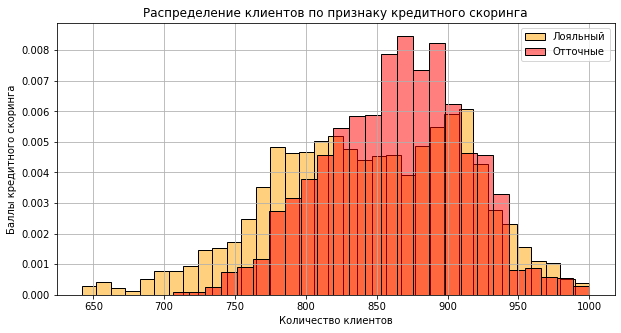

In [23]:
# рассмотрим взаимосвязь непрерывных значений с оттоком клиентов
plt.figure(figsize=(10,5))
sns.histplot(data[data['churn'] == 0], x='score', common_norm=False, color='orange', alpha = 0.5, stat="density")
sns.histplot(data[data['churn'] == 1], x='score', common_norm=False, color='red', alpha = 0.5, stat="density")
plt.grid()
plt.legend(['Лояльный', 'Отточные'])
plt.title('Распределение клиентов по признаку кредитного скоринга')
plt.xlabel('Количество клиентов')
plt.ylabel('Баллы кредитного скоринга')
plt.show()

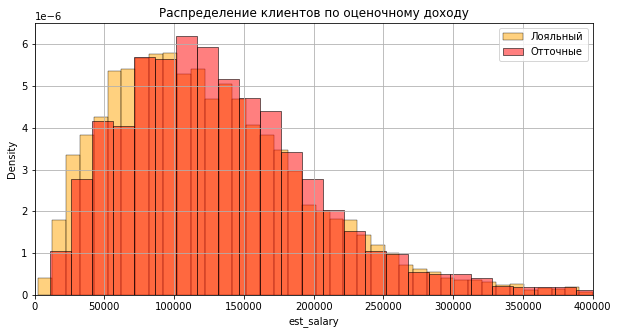

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['churn'] == 0], x='est_salary', common_norm=False, color='orange', alpha = 0.5, stat="density")
sns.histplot(data[data['churn'] == 1], x='est_salary', common_norm=False, color='red', alpha = 0.5, stat="density")
plt.xlim(0,400000)
plt.grid()
plt.legend(['Лояльный', 'Отточные'])
plt.title('Распределение клиентов по оценочному доходу')
plt.show()

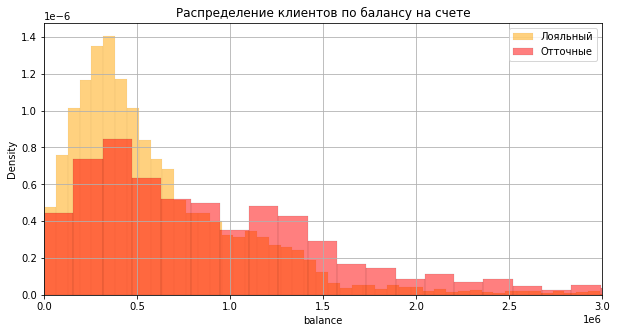

In [25]:
plt.figure(figsize=(10,5))
sns.histplot(data[data['churn'] == 0], x='balance', common_norm=False, color='orange', alpha = 0.5, stat="density")
sns.histplot(data[data['churn'] == 1], x='balance', common_norm=False, color='red', alpha = 0.5, stat="density")
plt.xlim(0,3000000)
plt.grid()
plt.legend(['Лояльный', 'Отточные'])
plt.title('Распределение клиентов по балансу на счете')
plt.show()

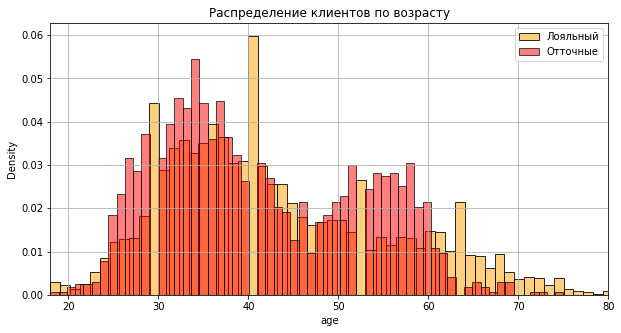

In [26]:
plt.figure(figsize=(10,5))
#bins=data.age.max()-data.age.min()+1
sns.histplot(data[data['churn'] == 0], x='age', common_norm=False, color='orange', alpha = 0.5, bins=62, stat="density")
sns.histplot(data[data['churn'] == 1], x='age', common_norm=False, color='red', alpha = 0.5, bins=62, stat="density")
plt.xlim(18,80)
plt.grid()
plt.legend(['Лояльный', 'Отточные'])
plt.title('Распределение клиентов по возрасту')
plt.show()

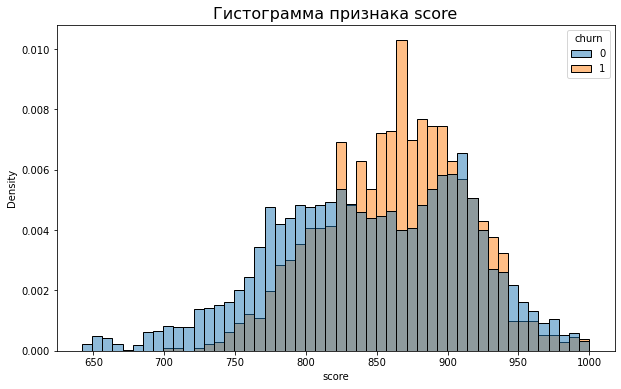

In [27]:
# построим гистограмму по признаку score
plt.figure(figsize = (10,6))
sns.histplot(data=data, x="score", hue="churn", stat="density", bins=50, common_norm=False)
plt.title('Гистограмма признака score', fontsize=16)
plt.show()

Из графиков выше можно сделать вывод, что для отточных клиентов более характеры показатели score 850-900, возрастные группы 30-40 лет и 50-60 лет, оценочный доход 70000-170000, баланс на счете 150000-650000.

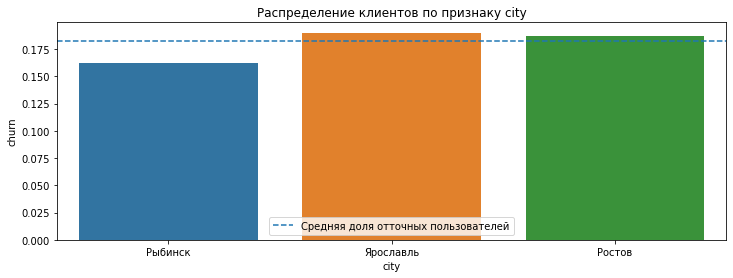

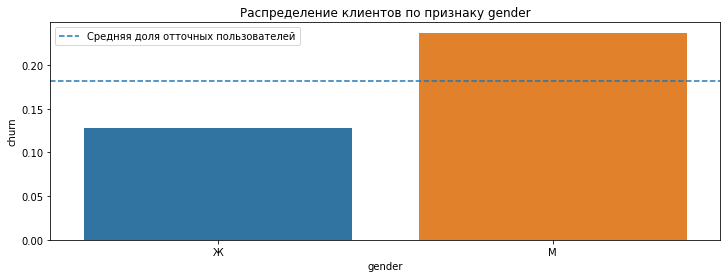

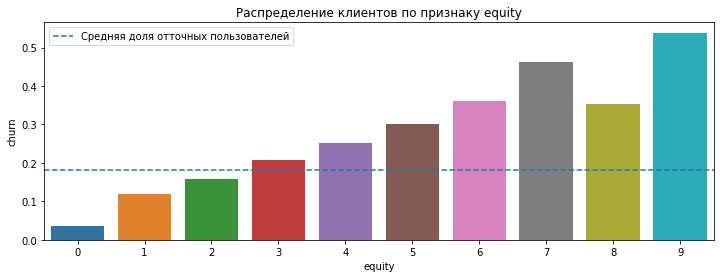

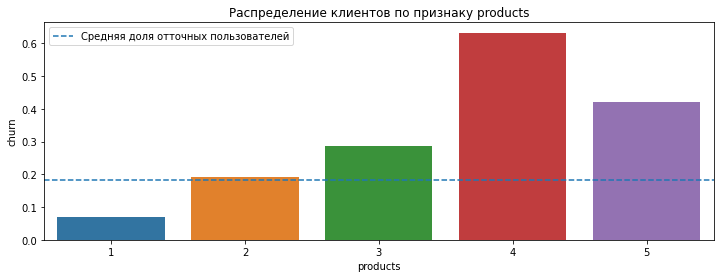

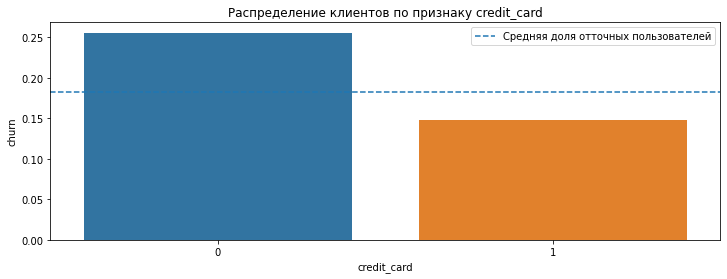

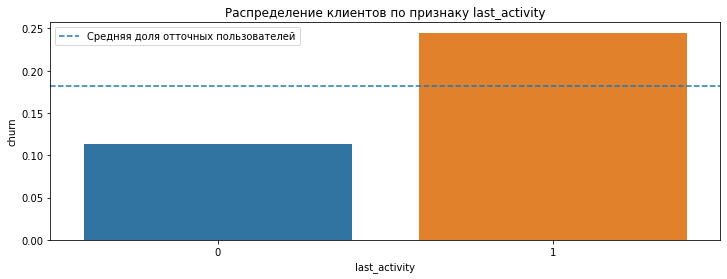

In [28]:
# рассмотрим взаимосвязь дискретных значений с оттоком клиентов
churn_mean=data['churn'].mean()

for column in ['city','gender', 'equity', 'products', 'credit_card', 'last_activity']:
    fig = plt.figure(figsize=(12,4))
    sns.barplot(data=data, x=column, y='churn', ci= None, );
    plt.axhline(y=churn_mean, linestyle='--', label='Средняя доля отточных пользователей')
    plt.legend()
    plt.title(f'Распределение клиентов по признаку {column}')
    plt.show()

Из графиков представленных выше видно, что город не сильно влияет на показатель оттока клиентов. Мужчин среди отточных пользователей больше, также для подобных клиентов характерно наличие более 3 баллов собственности, использование более 3 банковских продуктов, они не имеют кредитных карт и являются активными пользователями.

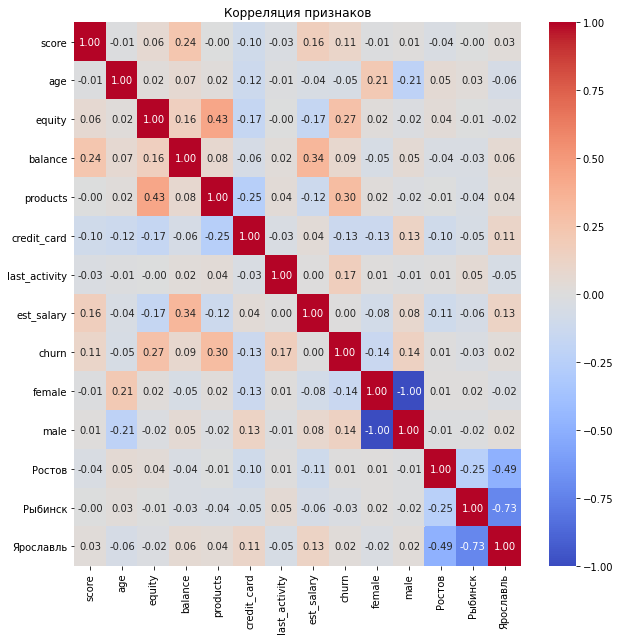

In [29]:
#построим тепловую карту  и посмотрим корреляцию 
correlation = data.drop('userid', axis=1).corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title(f'Корреляция признаков')
plt.show()

Корреляцию оттока с характеристиками equity, products можно оценить как умеренная, с остальными признаками корреляция слабая.

In [30]:
# составим портрет отточного и лояльного клиента
tab_churn = data.groupby('churn').agg({'score': 'mean',
                                      'age': 'median',
                                      'balance': 'mean',
                                      'est_salary': 'mean',
                                      'equity': 'median',
                                      'products': 'median',
                                      'credit_card': 'median',
                                      'last_activity': 'median',
                                      'female': 'mean',
                                       'male': 'mean',
                                       'Ростов': 'mean',
                                       'Рыбинск': 'mean',
                                       'Ярославль': 'mean'})
tab_churn

,score,age,balance,est_salary,equity,products,credit_card,last_activity,female,male,Ростов,Рыбинск,Ярославль
churn,,,,,,,,,,,,,
0,845.40,40.00,733031.63,147674.64,3,2,1,0,0.53,0.47,0.14,0.28,0.58
1,863.36,39.00,1134458.21,148357.48,4,2,1,1,0.35,0.65,0.15,0.24,0.61


In [31]:
pd.concat({
    'Лоятьные': tab_churn.loc[0],
    'Отточные': tab_churn.loc[1],
    'Разница %': (tab_churn.loc[1]/tab_churn.loc[0]-1)*100}, axis=1)

,Лоятьные,Отточные,Разница %
score,845.40,863.36,2.13
age,40.00,39.00,-2.50
balance,733031.63,1134458.21,54.76
est_salary,147674.64,148357.48,0.46
equity,3.00,4.00,33.33
products,2.00,2.00,0.00
credit_card,1.00,1.00,0.00
last_activity,0.00,1.00,inf
female,0.53,0.35,-34.47
male,0.47,0.65,39.35


Портрет отточного клиента: Зарплата 148357 руб., возраст 39 год, баланс 1134458 руб., пользуется 2 продуктами банка, количество баллов собственности: 4.

Портрет неотточного клиента: Зарплата 147674 руб., возраст 40 года, баланс 733031 руб., пользуется 2 продуктами банка, количество баллов собственности: 3.

## Праверка статистических гипотез

Нулевая гипотеза: доходы лояльных и отточных клиентов равны.  
Альтернитивная гипотеза: доходы лояльных и отточных клиентов не равны.

In [32]:
# проведём тест на соотвествие данных о доходах лояльных клиентов нормальному распределеню
churn_0 = data[data['churn'] == 0]['est_salary']

alpha = 0.05  # критический уровень статистической значимости

shapiro_test_stat, p_value = st.shapiro(churn_0)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  0.0
Распределение не нормально


In [33]:
# проведём тест на соотвествие данных о доходах отточных клиентов нормальному распределеню
churn_1 = data[data['churn'] == 1]['est_salary']

alpha = 0.05  # критический уровень статистической значимости

shapiro_test_stat, p_value = st.shapiro(churn_1)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  0.0
Распределение не нормально


In [34]:
# оценим дисперсии
print(data[data['churn'] == 0]['est_salary'].var())
print(data[data['churn'] == 1]['est_salary'].var())

20358839437.943962
15112272166.883385


Распределение значений не является нормальным, дисперсии не равны, поэтому вместо t-теста Стьюдента используются аналогичные методы непараметрический тест Манна — Уитни.

In [35]:
# проведем u-test

alpha = 0.05  

results = st.mannwhitneyu(churn_1, churn_0)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  0.00016830729188229058
Отвергаем нулевую гипотезу


Таким образом, отвергаем нулевую гипотезу, доходы оставшихся и отточных клиентов не равны.

Нулевая гипотеза: возраст отточного клиента больше возраста неотточного клиента  
Альтернативная гипотеза: возраст отточного клиента меньше возраста неотточного клиента

In [36]:
# проведём тест на соотвествие данных о возрасте лояльных клиентов нормальному распределеню
churn_0 = data[data['churn'] == 0]['age']

alpha = 0.05  # критический уровень статистической значимости

shapiro_test_stat, p_value = st.shapiro(churn_0)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение')  

p-значение:  2.1159606811304738e-43
Распределение не нормально


In [37]:
# проведём тест на соотвествие данных о возрасте отточных клиентов нормальному распределеню
churn_1 = data[data['churn'] == 1]['age']

alpha = 0.05  # критический уровень статистической значимости

shapiro_test_stat, p_value = st.shapiro(churn_1)

print('p-значение: ', p_value)
if p_value < alpha:
    print('Распределение не нормально')
else:
    print('Нормальное распределение') 

p-значение:  6.457381867311257e-24
Распределение не нормально


In [38]:
# оценим дисперсии
print(data[data['churn'] == 0]['age'].var())
print(data[data['churn'] == 1]['age'].var())

153.14575130756242
124.20555195310395


Аналогично распределение значений не является нормальным, дисперсии не равны, поэтому вместо t-теста Стьюдента используются аналогичные методы непараметрический тест Манна — Уитни.

In [39]:
# проведем u-test

alpha = 0.05  

results = st.mannwhitneyu(churn_1, churn_0, alternative='greater')

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение:  0.9999980941264217
Не получилось отвергнуть нулевую гипотезу


Таким обраразом, не полчилось отвергнуть нулевую гипотезу, возраст отточного клиента больше возраста неотточного клиента

## Подведение промежуточных итогов

Для отточных клиентов более характеры показатели score 850-900, возрастные группы 30-40 лет и 50-60 лет, оценочный доход 70000-170000, баланс по счету 150000-650000. Город не сильно влияет на показатель оттока клиентов. Мужчин среди отточных пользователей больше, также для подобных клиентов характерно наличие более 3 баллов собственности, использование более 3 банковских продуктов, они не имеют кредитных карт и являются активными пользователями.  

Корреляцию оттока с характеристиками equity, products можно оценить как умеренная, с остальными признаками корреляция слабая.  

Портрет отточного клиента: Зарплата 148357 руб., возраст 41 год, баланс 1134458 руб., пользуется 2 продуктами банка, количество баллов собственности: 4.

Портрет неотточного клиента: Зарплата 147674 руб., возраст 43 года, баланс 733031 руб., пользуется 2 продуктами банка, количество баллов собственности: 3.  

В результате проверки гипотезы принято, что доходы оставшихся и отточных клиентов не равны, также возраст отточного клиента больше возраста неотточного клиента

## Сегментация на основе выделенных признаков

В результате проведенного анализа мы выделили наиболее характерные показатели отточных клиентов. Данные характеристики мы будем использвать для сигментации пользвателей.

Сегмент №1  
Пол: мужской  
Возраст: 30-40 лет  
Баланс: 150000-650000

In [40]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №1:', 
       data.query ('male==1 and 30<=age<=40 and 150000<balance<650000')['userid'].count())


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №1:', 
       data.query ('male==1 and 30<=age<=40 and 150000<balance<650000 and churn==1')['userid'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №1:', data.query (
    'male==1 and 30<=age<=40 and 150000<balance<650000  and churn==1')['userid'].count() / data.query (
    'male==1 and 30<=age<=40 and 150000<balance<650000')['userid'].count()*100)

Общее число пользователей в сегменте №1: 780
Число отточных пользователей в сегменте №1: 161
Доля отточных пользователей в сегменте №1: 20.64102564102564


Сегмент №2  
Пол: мужской  
Возраст: 50-60 лет  
Количество баллов собственности: 3 и выше  

In [41]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №2:', 
       data.query ('male==1 and 50<=age<=60 and equity>=3')['userid'].count())


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №2:', 
       data.query ('male==1 and 50<=age<=60 and equity>=3 and churn==1')['userid'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №2:', data.query (
    'male==1 and 50<=age<=60 and equity>=3  and churn==1')['userid'].count() / data.query (
    'male==1 and 50<=age<=60 and equity>=3')['userid'].count()*100)

Общее число пользователей в сегменте №2: 470
Число отточных пользователей в сегменте №2: 219
Доля отточных пользователей в сегменте №2: 46.59574468085106


In [42]:
# Рассчитаем общее число пользователей в этом сегменте:
print ('Общее число пользователей в сегменте №3:', 
       data.query ('last_activity==1 and products>=3 and equity>=3')['userid'].count())


# Рассчитаем число отточных пользователей в этом сегменте:
print ('Число отточных пользователей в сегменте №3:', 
       data.query ('last_activity==1 and products>=3 and equity>=3 and churn==1')['userid'].count())

#  Рассчитаем долю отточных пользователей:
print ('Доля отточных пользователей в сегменте №3:', data.query (
    'last_activity==1 and products>=3 and equity>=3  and churn==1')['userid'].count() / data.query (
    'last_activity==1 and products>=3 and equity>=3')['userid'].count()*100)

Общее число пользователей в сегменте №3: 676
Число отточных пользователей в сегменте №3: 343
Доля отточных пользователей в сегменте №3: 50.7396449704142


Если располагать сегменты в порядке приоритетности, то расположим их в порядке убывания доли отточных клиентов.

1. Сегмент №3 - 51% отточных клиентов  
Активный клиент  
Количество баллов собственности: 3 и выше  
Количество используемых продуктов: 3 и больше   
  
  
2. Сегмент №2 - 46% отточных клиентов  
Пол: мужской  
Возраст: 50-60 лет  
Количество баллов собственности: 3 и выше  
  
  
3. Сегмент №1 - 21% отточных клиентов  
Пол: мужской  
Возраст: 30-40 лет  
Баланс: 150000-650000  

## Выводы и рекомендации

Для отточных клиентов более характеры показатели score 850-900, возрастные группы 30-40 лет и 50-60 лет, оценочный доход 70000-170000, баланс по счету 150000-650000. Город не сильно влияет на показатель оттока клиентов. Мужчин среди отточных пользователей больше, также для подобных клиентов характерно наличие более 3 баллов собственности, использование более 3 банковских продуктов, они не имеют кредитных карт и являются активными пользователями.  

Корреляцию оттока с характеристиками equity, products можно оценить как умеренная, с остальными признаками корреляция слабая.  

Портрет отточного клиента: Зарплата 148357 руб., возраст 41 год, баланс 1134458 руб., пользуется 2 продуктами банка, количество баллов собственности: 4.  

Портрет неотточного клиента: Зарплата 147674 руб., возраст 43 года, баланс 733031 руб., пользуется 2 продуктами банка, количество баллов собственности: 3.  

В результате проверки гипотезы принято, что доходы оставшихся и отточных клиентов не равны, также возраст отточного клиента больше возраста неотточного клиента.  

На основании этих данных мы выделили три сегмента отточных клиентов:

1. Сегмент №3 - 51% отточных клиентов  
Активный клиент  
Количество баллов собственности: 3 и выше  
Количество используемых продуктов: 3 и больше   
  
  
2. Сегмент №2 - 46% отточных клиентов  
Пол: мужской  
Возраст: 50-60 лет  
Количество баллов собственности: 3 и выше  
  
  
3. Сегмент №1 - 21% отточных клиентов  
Пол: мужской  
Возраст: 30-40 лет  
Баланс: 150000-650000  

С учетом выделенных сегментов, можно предложить следующие рекомендации по удержанию отточных клиентов:

- для отточных клиентов сегмента №3 можно предложить более выгодные услуги страхования собственности: недвижимость, автомобиль
- для отточных клиентов сегмента №2 можно предложить более выгодные программы перевода накопительной части пенсии
- для отточных клиентов сегмента №1 можно предложить программы кешбека, ипотечные программы и выдачу кредитных карт.